In [1]:
def intersection(int1, int2):
    
    if (int1[0] <= int2[1] and int1[1] >= int2[0]): 
        return 'overlap'
    
    else:
        return 'not overlap'

    #case 1: partial intersection over the left or right border
    #if (int2[0]<=int1[0] and int2[1]>=int1[1]) or (int2[0]>=int1[0] and int2[1]<=int1[1]):
        #return min(int1[1],int2[1]) - max(int1[0],int2[0])
        #return 'overlap'

    #case 2: complete overlap of one interval by the other
    #elif (int2[0]>=int1[0] and int2[1]<=int1[1]) or (int2[0]<=int1[0] and int2[1]>=int1[1]):
        #return min (int2[1]-int2[0] , int1[1]-int1[0])
        #return 'overlap'

    #case 3: no overlap at all
    #else:
        #return 'not overlap'

In [2]:
import ROOT
from ROOT import gStyle
import scipy
import numpy as np
#import statsmodels
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest

Welcome to JupyROOT 6.10/09


In [3]:
type = 'b'

#file_LLR = ROOT.TFile('/gpfs/ddn/cms/user/grippo/Run2017_analysis_hh_bbtautau/CMSSW_9_4_8/src/btag_efficiency_BigMassCut.root')
file_LLR = ROOT.TFile('/gpfs/ddn/cms/user/grippo/Run2017_analysis_hh_bbtautau/CMSSW_9_4_8/src/btag_efficiency_ANMassCut_PU.root')
#file_LLR = ROOT.TFile('/gpfs/ddn/cms/user/grippo/Run2017_analysis_hh_bbtautau/CMSSW_9_4_8/src/btag_efficiency_full.root')
#file_LLR = ROOT.TFile('/gpfs/ddn/cms/user/grippo/Run2017_analysis_hh_bbtautau/CMSSW_9_4_8/src/bTagEfficiencies_94X_2018WPs_Fall17MC_cleanJets_09_12_2018.root')
h_num_LLR = file_LLR.Get('All/Efficiency/h2_Num_'+type +'_M_all')
h_denom_LLR = file_LLR.Get('All/Efficiency/h2_Denom_'+type +'_all_all')
#h_num_LLR = file_LLR.Get('h2_BTaggingEff_Num_'+type +'_M_ALL')
#h_denom_LLR = file_LLR.Get('h2_BTaggingEff_Denom_'+type +'_M_ALL')

file_PI = ROOT.TFile('/gpfs/ddn/cms/user/grippo/Run2017_analysis_hh_bbtautau/CMSSW_9_4_8/src/btag_efficiency_BigMassCut_PU.root')
#file_PI = ROOT.TFile('/gpfs/ddn/cms/user/grippo/Run2017_analysis_hh_bbtautau/CMSSW_9_4_8/src/btag_efficiency_full.root')
#file_PI = ROOT.TFile('/gpfs/ddn/cms/user/grippo/Run2017_analysis_hh_bbtautau/CMSSW_9_4_8/src/BTagEfficiency_deep_csv_pu_id_full.root')
h_num_PI = file_PI.Get('All/Efficiency/h2_Num_'+type +'_M_all')
h_denom_PI = file_PI.Get('All/Efficiency/h2_Denom_'+type +'_all_all')

In [4]:
#canvas = ROOT.TCanvas('', '', 600, 600)
#h_num_LLR.Draw('colz')
#canvas.Draw()

In [5]:
#canvas1 = ROOT.TCanvas('pippo', 'pippo', 600, 600)
#h_denom_PI.Draw('colz')
#canvas1.Draw()

In [6]:


print('{:10} {:10} {:10} {:10} {:10} {:10} {:10} {:15} {:15} {:10} {:10} {:10} {:15} {:15} {:10}'.
      format('pt_min', 'pt_max', 'eta_min', 'eta_max' , 'eff_PI', 'ci_PI_low', 'ci_PI_up', 'err_low_PI[%]', 'err_up_PI[%]', 'eff_LLR' , 'ci_LLR_low', 'ci_LLR_up','err_low_LLR[%]', 'err_up_LLR[%]', 'p_value'))

h_pvalue = h_denom_PI.Clone()

for bin_x in range(1, h_num_LLR.GetXaxis().GetNbins() + 1):
    for bin_y in range(1, h_num_LLR.GetYaxis().GetNbins() + 1):
        eff_PI = h_num_PI.GetBinContent(bin_x, bin_y)/h_denom_PI.GetBinContent(bin_x, bin_y)
        eff_LLR = h_num_LLR.GetBinContent(bin_x, bin_y)/h_denom_LLR.GetBinContent(bin_x, bin_y)
        ci_LLR = proportion_confint(count=h_num_LLR.GetBinContent(bin_x, bin_y), nobs=h_denom_LLR.GetBinContent(bin_x, bin_y), alpha=0.32, method='beta')
        ci_PI = proportion_confint(count=h_num_PI.GetBinContent(bin_x, bin_y), nobs=h_denom_PI.GetBinContent(bin_x, bin_y), alpha=0.32, method='beta')
        
        if(eff_PI==0):
            err_low_PI = 0
            err_up_PI = 0
        else :
            err_low_PI = ((eff_PI - ci_PI[0])/eff_PI)*100
            err_up_PI = ((ci_PI[1] - eff_PI)/eff_PI)*100
        
        if(eff_LLR==0):
            err_low_LLR = 0
            err_up_LLR = 0
        else: 
            err_low_LLR = ((eff_LLR - ci_LLR[0])/eff_LLR)*100
            err_up_LLR = ((ci_LLR[1] - eff_LLR)/eff_LLR)*100
        
        int2 = [ci_PI[0],ci_PI[1]]
        int1 = [ci_LLR[0],ci_LLR[1]]
        
        counts = np.array([h_num_PI.GetBinContent(bin_x, bin_y), h_num_LLR.GetBinContent(bin_x, bin_y)])
        nobs = np.array([h_denom_PI.GetBinContent(bin_x, bin_y), h_denom_LLR.GetBinContent(bin_x, bin_y)])
        stat, pval = proportions_ztest(counts, nobs)
        
        h_pvalue.SetBinContent(bin_x, bin_y,pval)
    
        print('{:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.4f} {:<10.4f} {:<10.4f} {:<15.2f} {:<15.2f} {:<10.4f} {:<10.4f} {:<10.4f} {:<15.2f} {:<15.2f} {:<10.3f}'.
              format(h_num_LLR.GetXaxis().GetBinLowEdge(bin_x), h_num_LLR.GetXaxis().GetBinLowEdge(bin_x+1),
                    h_num_LLR.GetYaxis().GetBinLowEdge(bin_y), h_num_LLR.GetYaxis().GetBinLowEdge(bin_y+1),
                    eff_PI, ci_PI[0], ci_PI[1], err_low_PI, err_up_PI, eff_LLR, ci_LLR[0], ci_LLR[1], err_low_LLR, err_up_LLR, pval))        


pt_min     pt_max     eta_min    eta_max    eff_PI     ci_PI_low  ci_PI_up   err_low_PI[%]   err_up_PI[%]    eff_LLR    ci_LLR_low ci_LLR_up  err_low_LLR[%]  err_up_LLR[%]   p_value   
20.00      30.00      0.00       0.60       0.6509     0.6491     0.6527     0.28            0.28            0.6468     0.6445     0.6491     0.36            0.36            0.160     
20.00      30.00      0.60       1.20       0.6645     0.6627     0.6664     0.28            0.28            0.6640     0.6617     0.6663     0.35            0.35            0.846     
20.00      30.00      1.20       2.10       0.6239     0.6221     0.6256     0.29            0.29            0.6238     0.6215     0.6260     0.36            0.36            0.970     
20.00      30.00      2.10       2.40       0.5357     0.5315     0.5400     0.79            0.79            0.5429     0.5377     0.5482     0.97            0.96            0.285     
30.00      40.00      0.00       0.60       0.7301     0.7287     0.7314   

Info in <TCanvas::Print>: pdf file p_value_b_PIanMass_PIbigMass_PU.pdf has been created


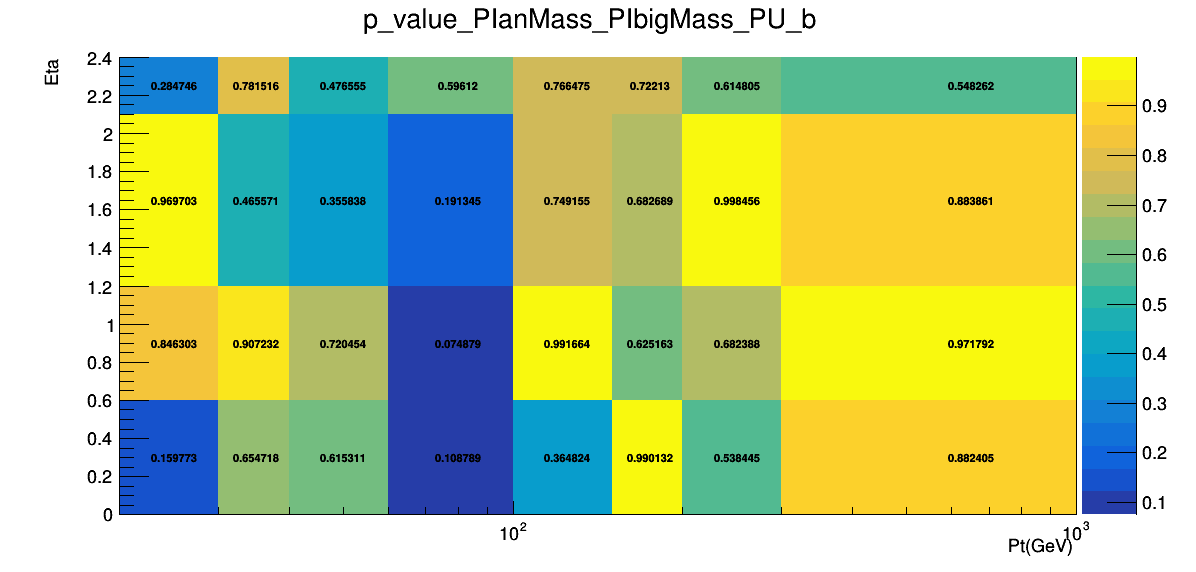

In [7]:
canvas = ROOT.TCanvas('', '', 1200, 600)
h_pvalue.SetTitle('p_value_PIanMass_PIbigMass_PU_'+type)
h_pvalue.GetXaxis().SetTitle('Pt(GeV)')
h_pvalue.GetYaxis().SetTitle('Eta')
h_pvalue.Draw('textCOLZ')
gStyle.SetOptStat(0)
canvas.SetLogx()
canvas.Draw()
canvas.SaveAs('p_value_'+type+'_PIanMass_PIbigMass_PU.pdf')